In [34]:
import pandas as pd
import numpy as np
import json
import folium
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Loading the 10-minute resolution sensor data

In [35]:
with open('../data/sensors/10-minute.json') as json_file:  
    sensors = json.load(json_file)

#### Loading precipitation data

In [62]:
precipitation = pd.read_pickle('../data/weather/precipitation.pkl')

In [61]:
precipitation2018 = precipitation['2018-01-01':'2018-05-01']
precipitation2018[precipitation2018['Amt[PrecipHourly1]'] > 10]

## '2018-03-01':'2018-03-04' -> raining 

Amt[PrecipHourly1]
datetime                               
2018-01-05 05:59:00                12.4
2018-01-05 13:00:00                11.4
2018-01-13 05:59:00                11.4
2018-02-05 04:00:00                14.0
2018-02-05 05:59:00                24.4
2018-02-05 07:00:00                19.0
2018-02-05 13:00:00                24.4
2018-02-08 01:00:00                14.0
2018-02-08 05:59:00                21.3
2018-02-08 13:00:00                21.3
2018-02-11 16:00:00                11.0
2018-02-11 19:00:00                15.0
2018-02-12 05:59:00                28.7
2018-02-18 05:59:00                12.2
2018-02-18 07:00:00                13.0
2018-02-25 13:00:00                15.0
2018-02-25 19:00:00                18.0
2018-02-26 05:59:00                33.0
2018-02-26 12:51:00                18.0
2018-02-26 13:00:00                18.0
2018-03-02 05:59:00                14.5
2018-03-02 07:00:00                19.0
2018-03-02 10:00:00                18.0
2018-03-02 13:00:00                25.0
2018-03-02 19:00:00                15.0
2018-03-03 05:59:00                54.9
2018-03-03 13:00:00                25.1
2018-03-08 01:00:00                13.0
2018-03-08 05:59:00                25.9
2018-03-22 05:59:00                22.4
2018-03-22 07:00:00                11.0

/Users/jlrulff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jlrulff/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/jlrulff/anaconda3/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


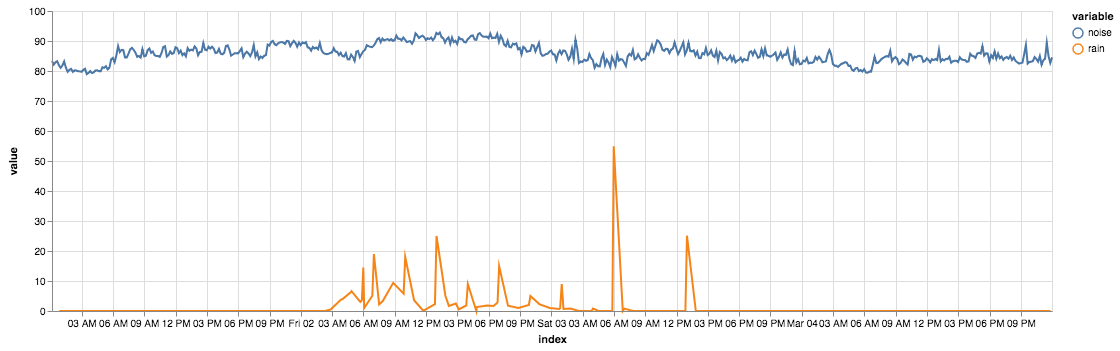

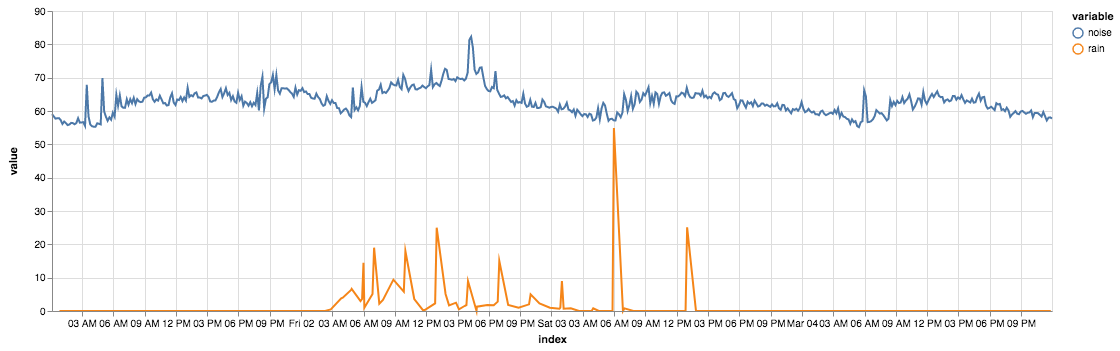

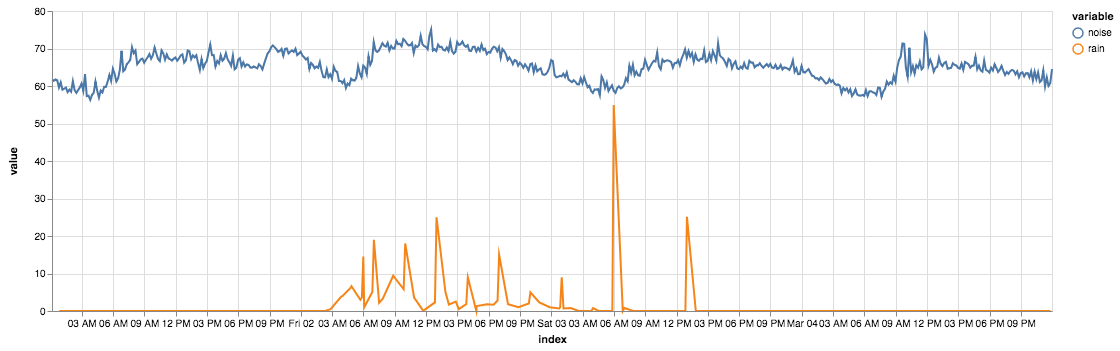

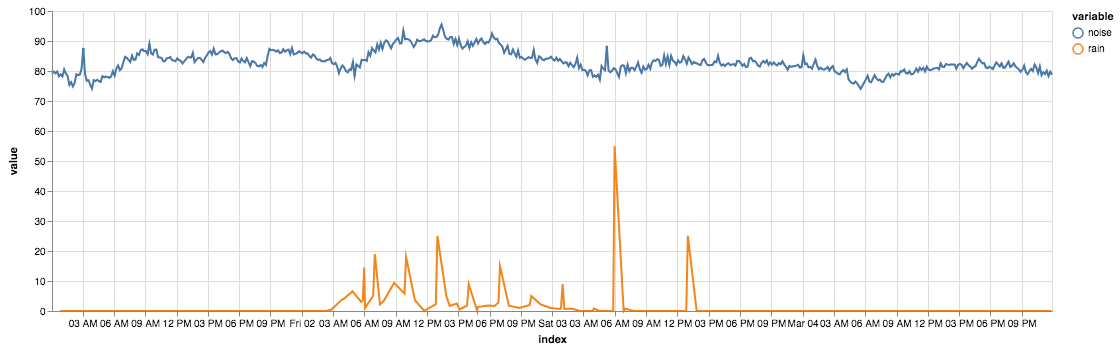

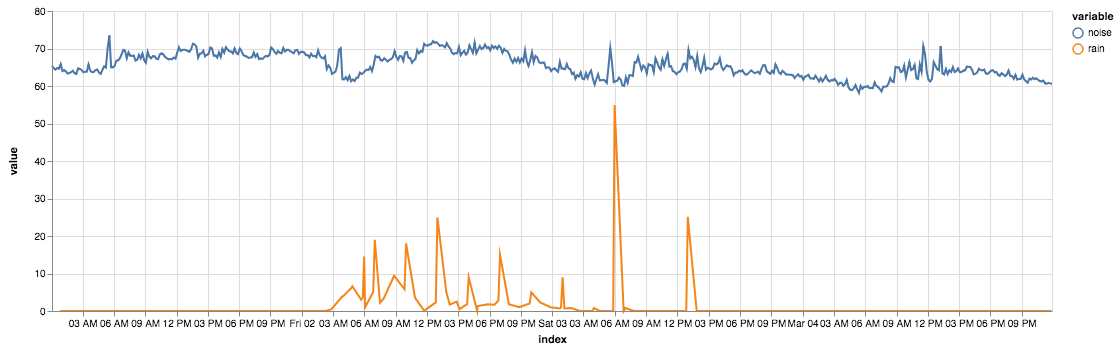

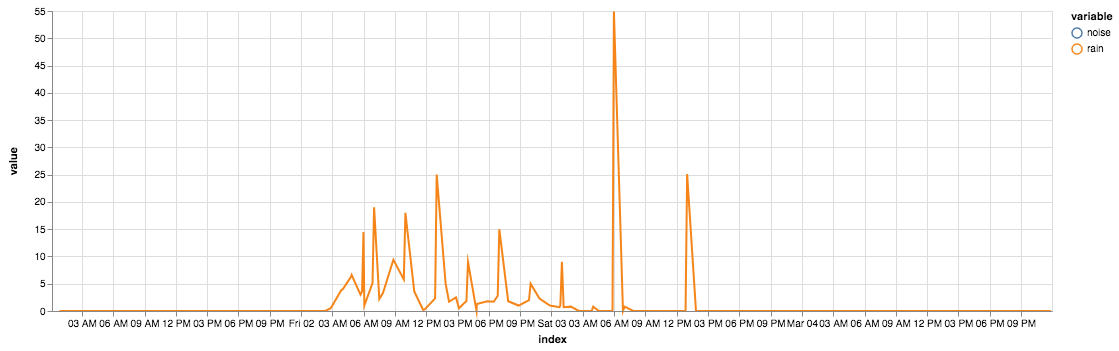

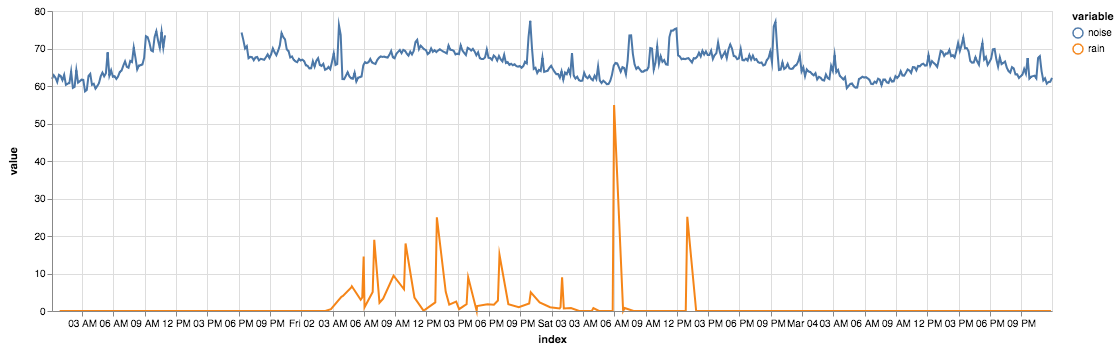

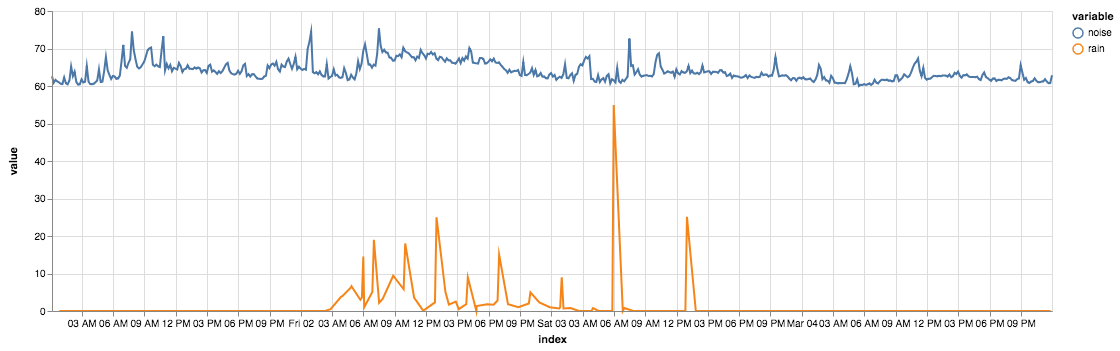

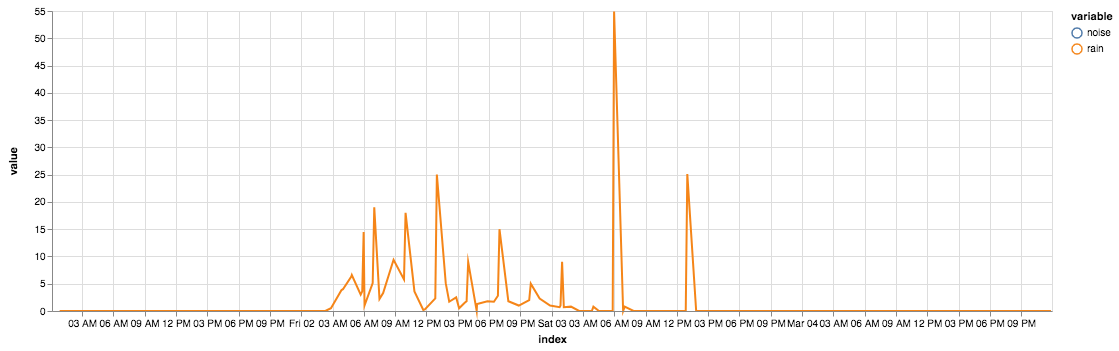

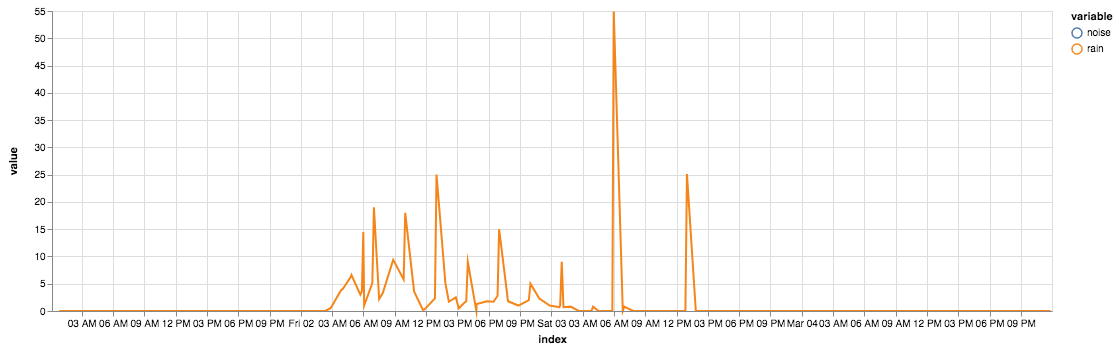

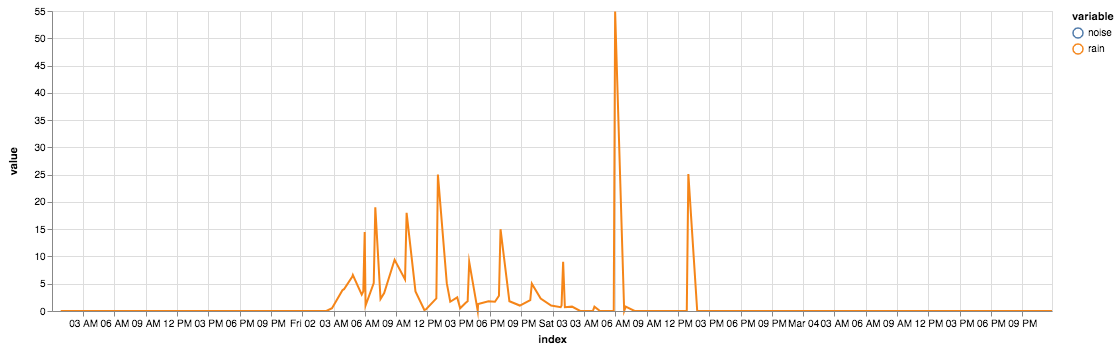

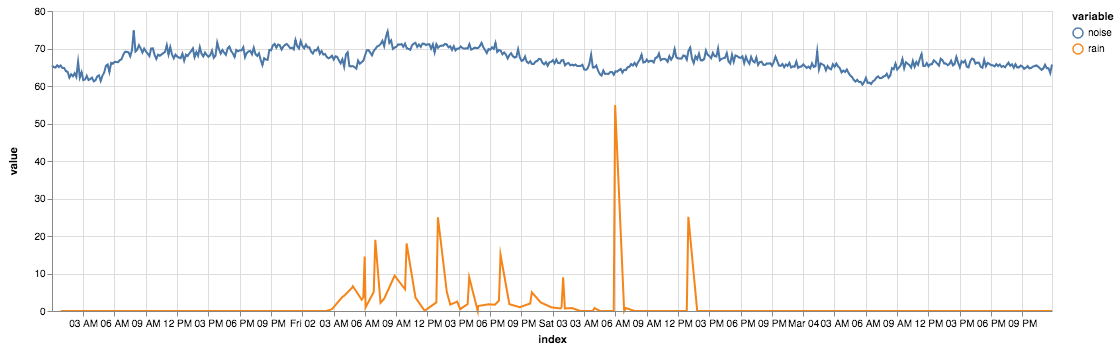

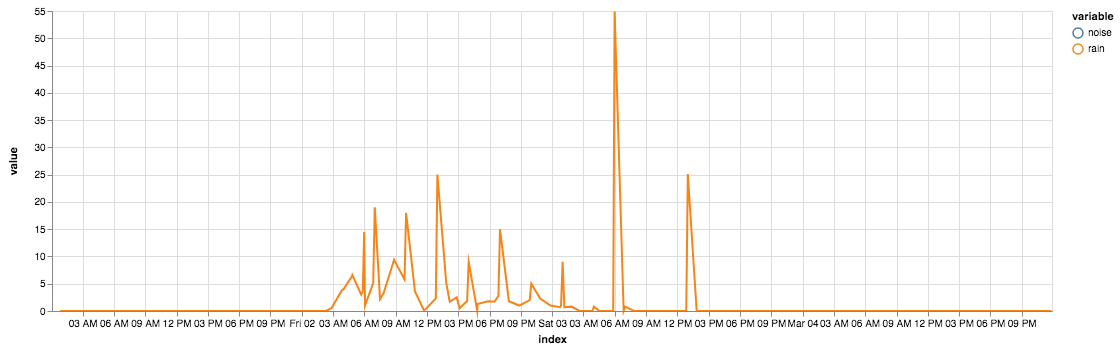

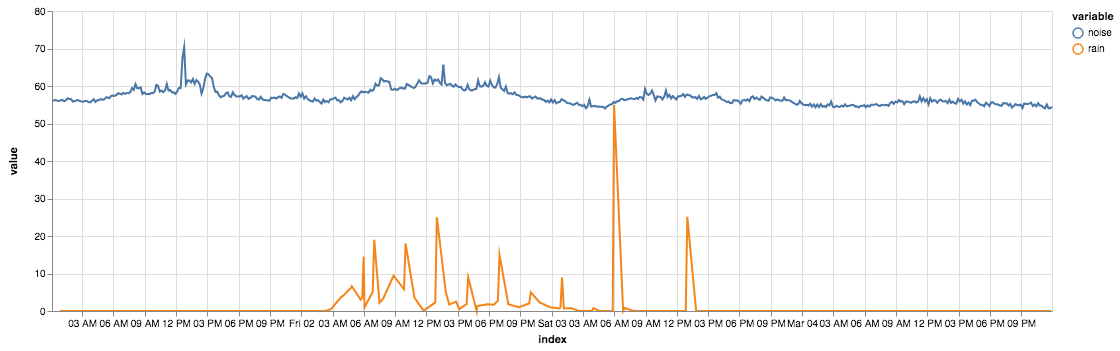

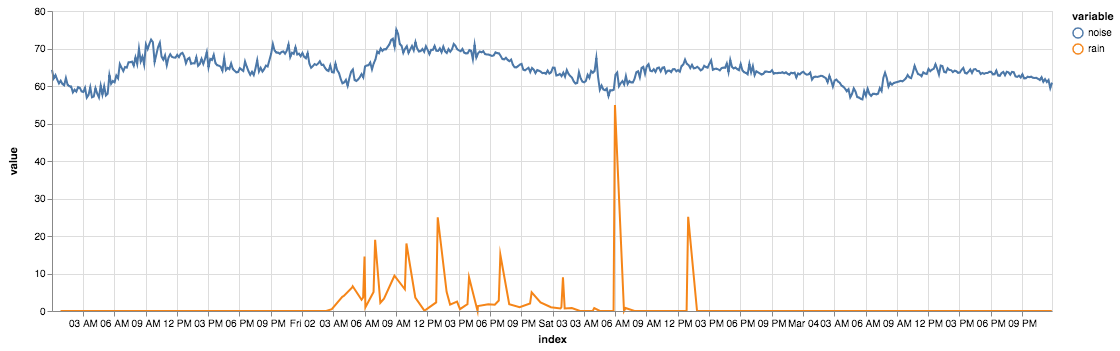

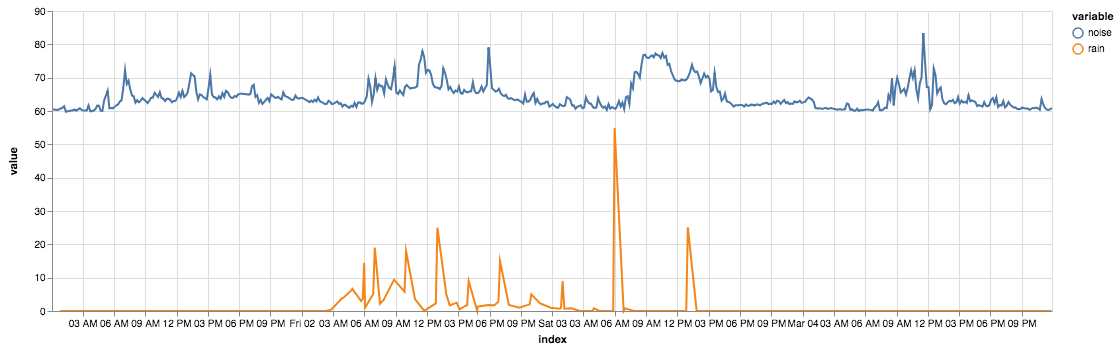

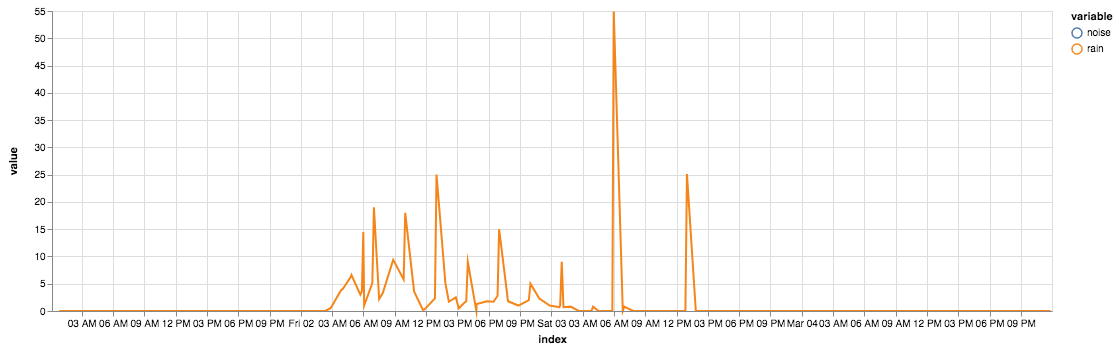

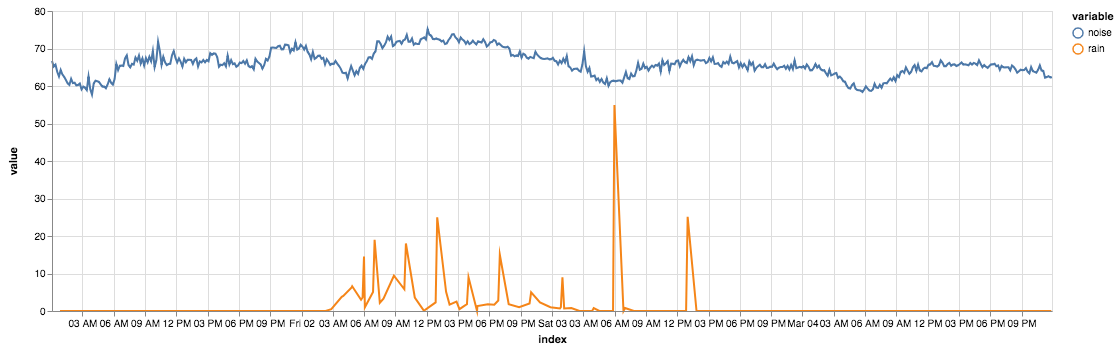

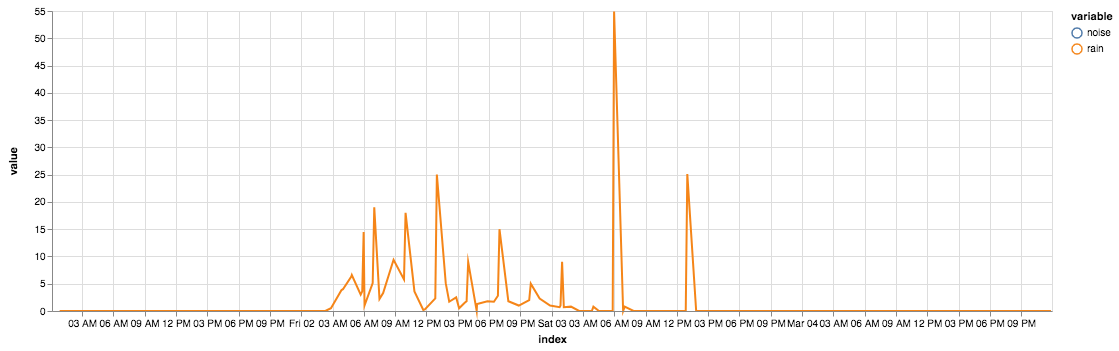

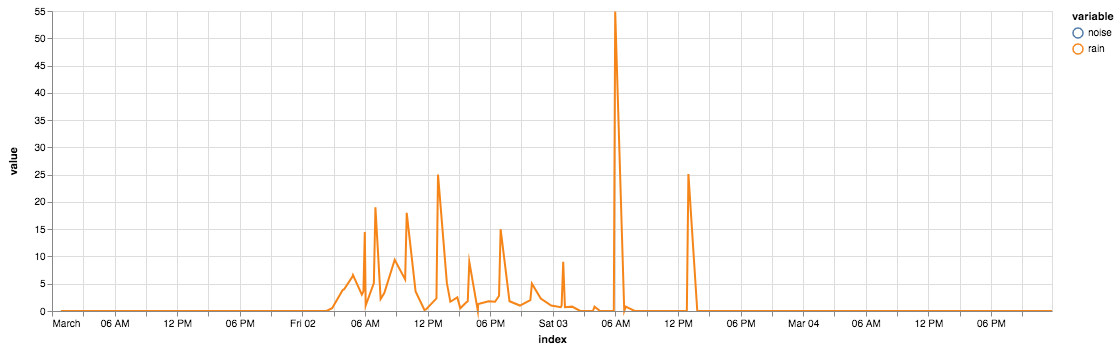

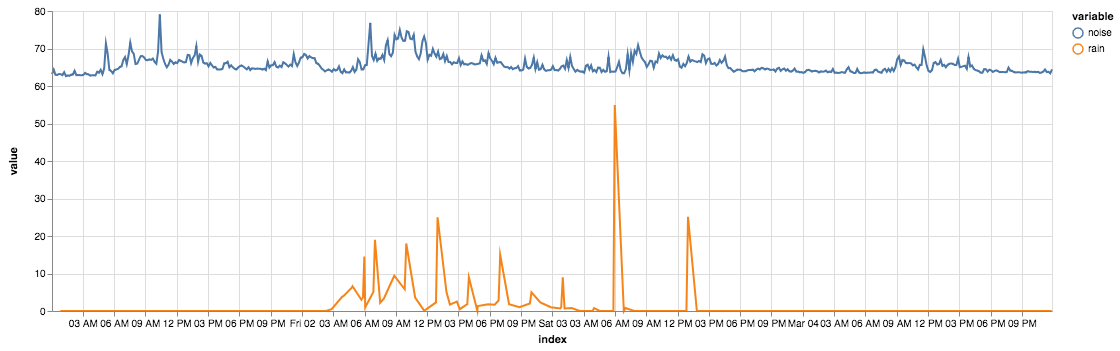

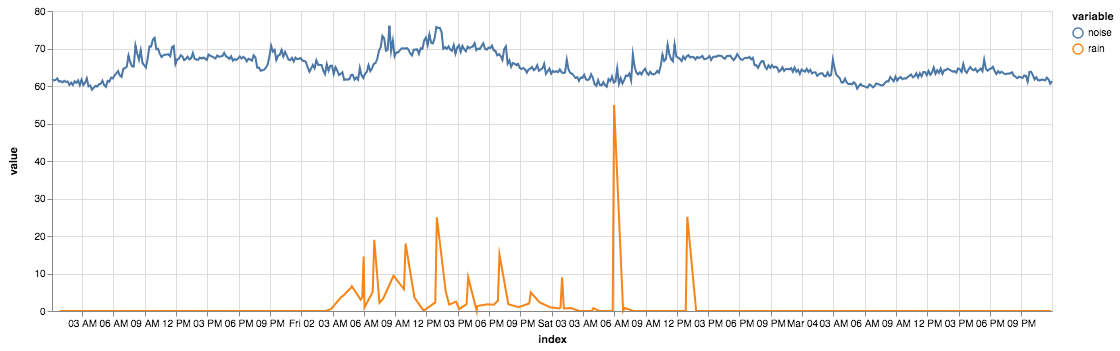

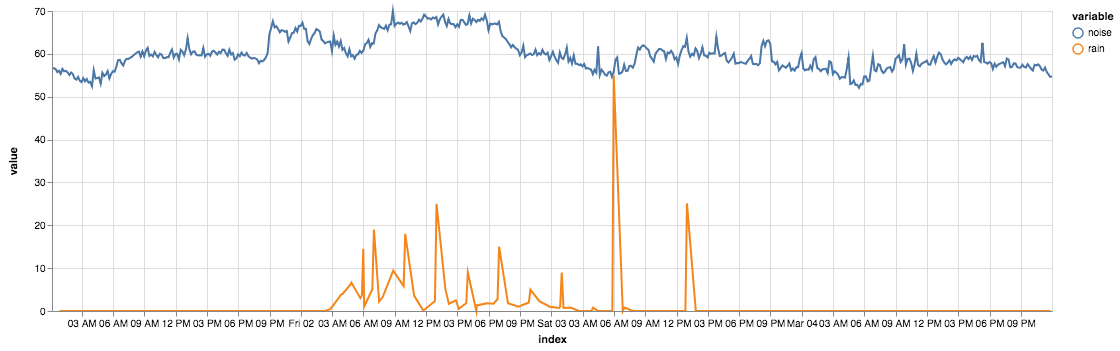

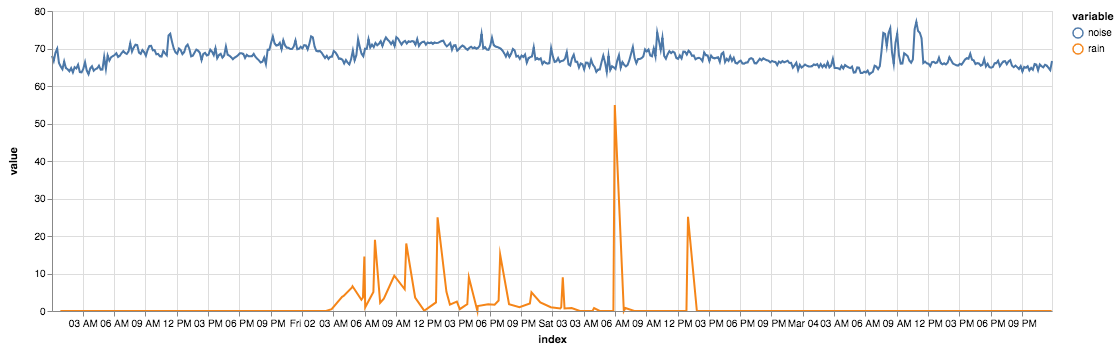

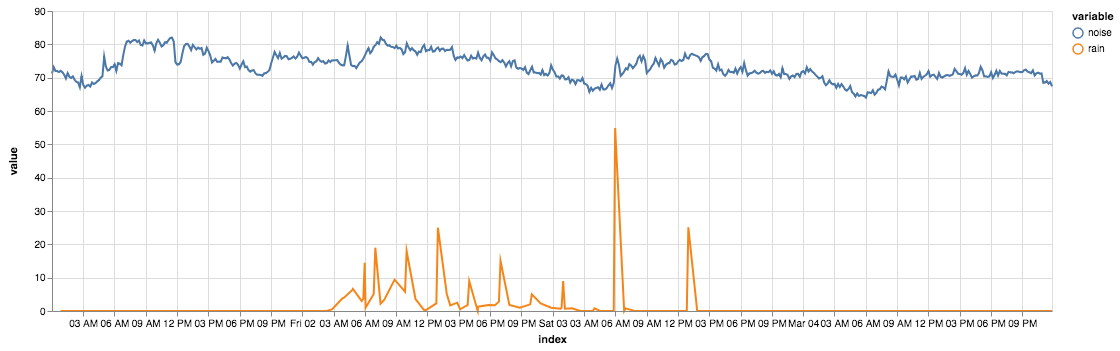

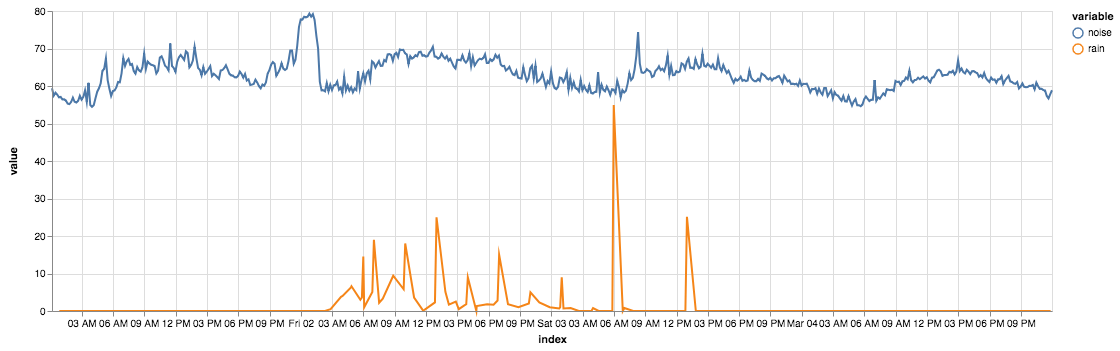

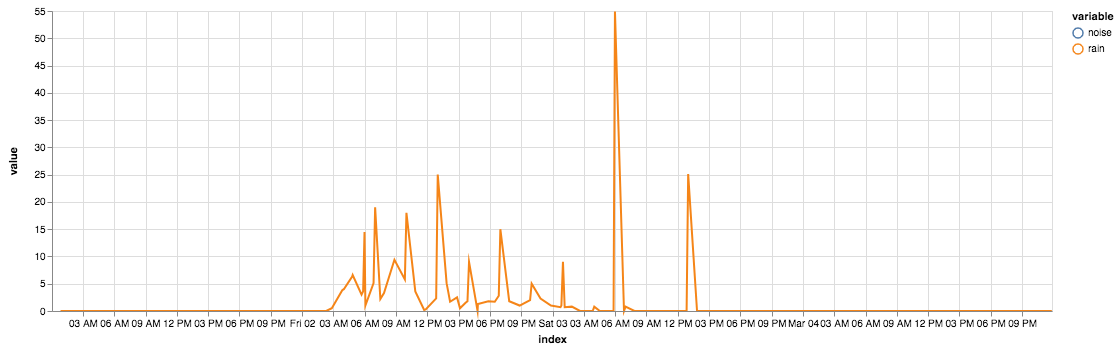

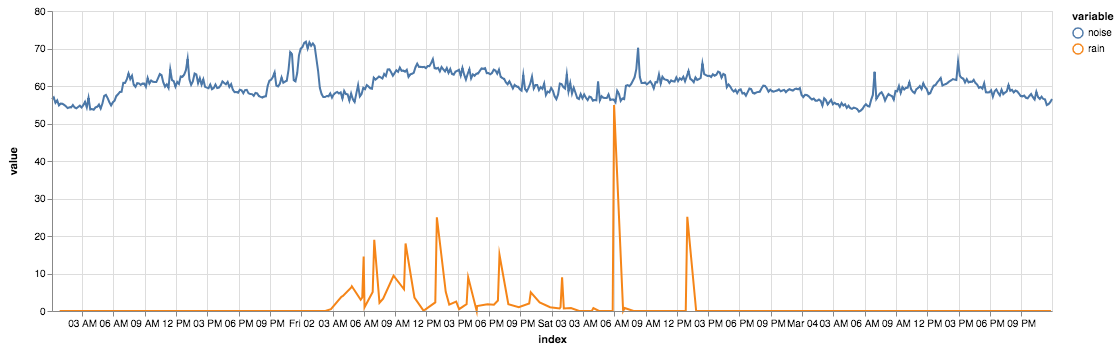

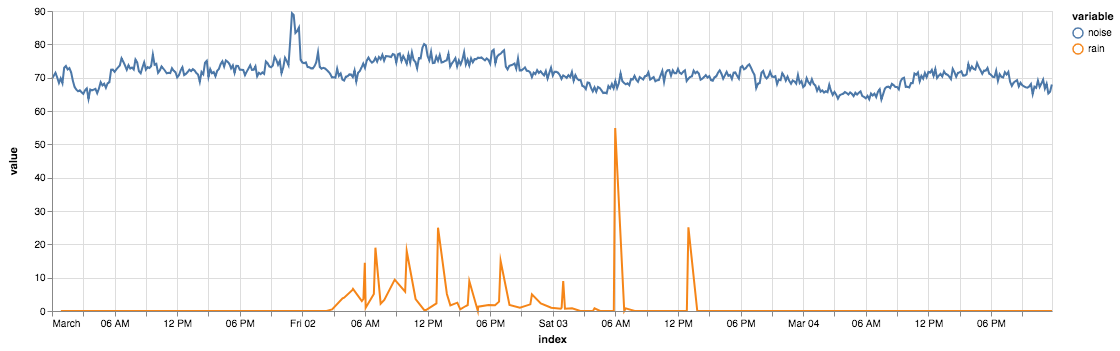

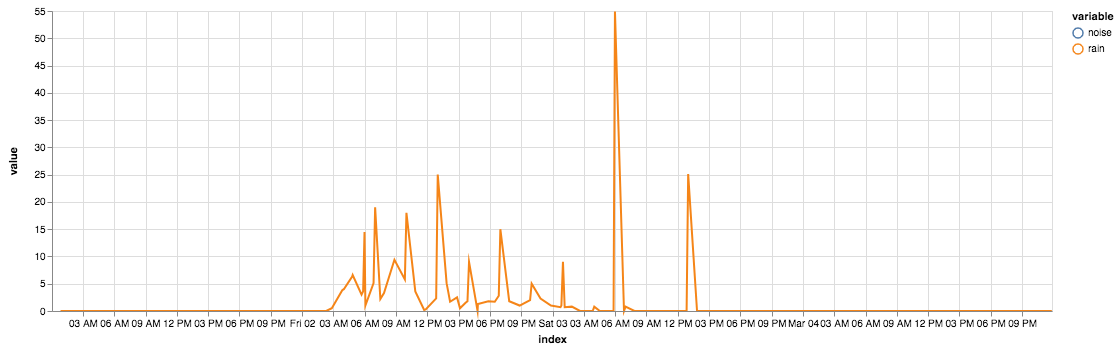

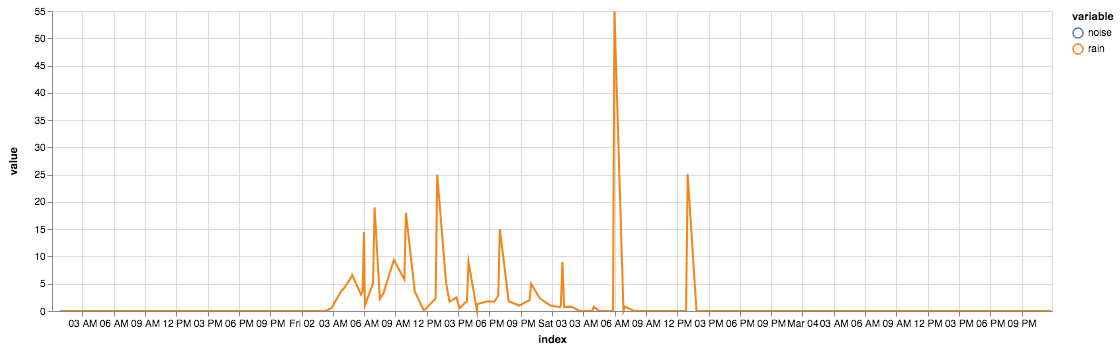

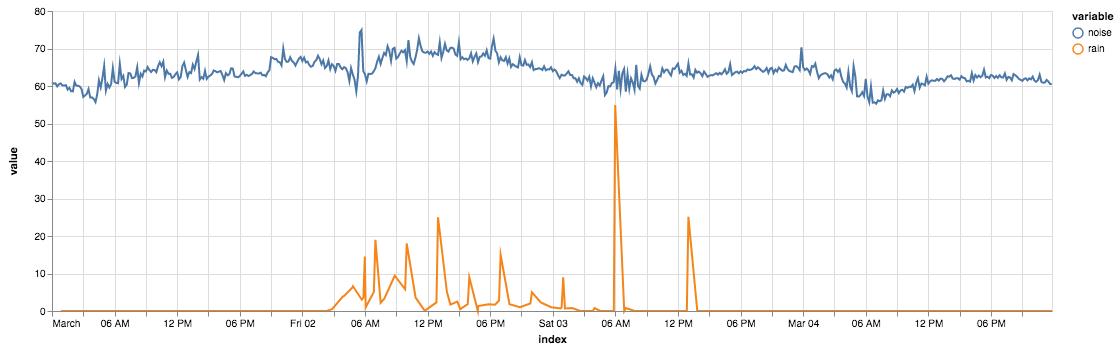

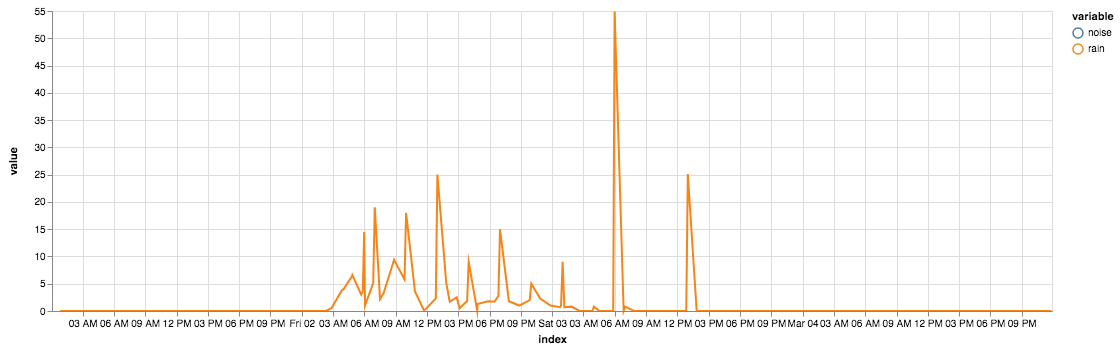

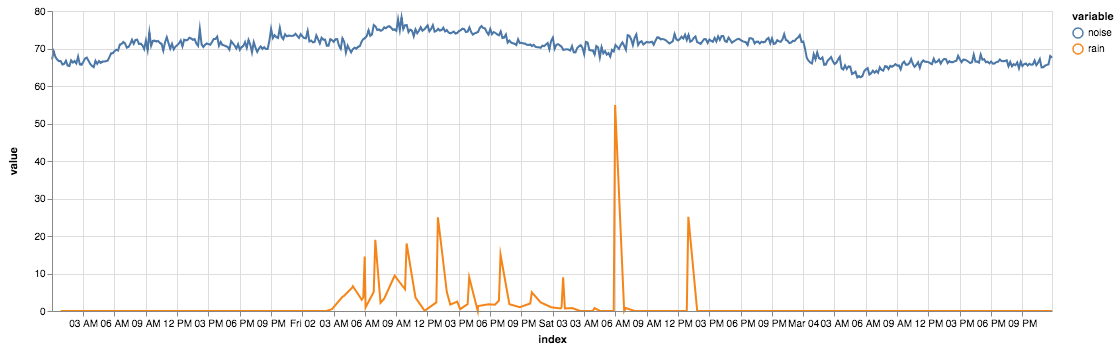

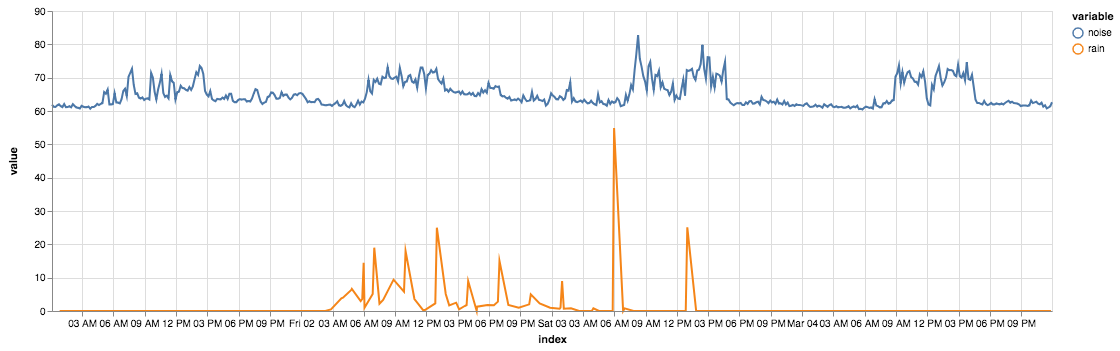

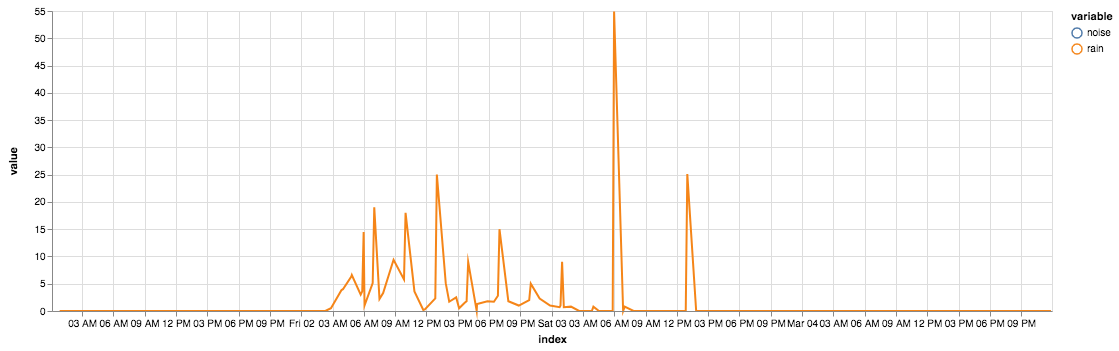

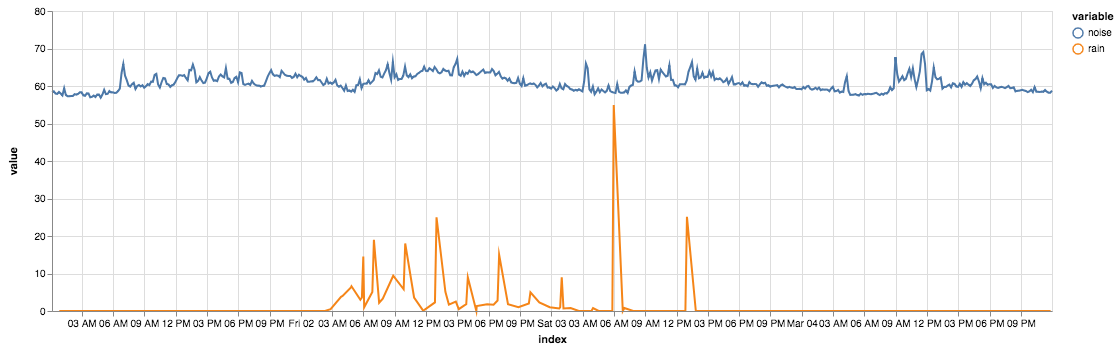

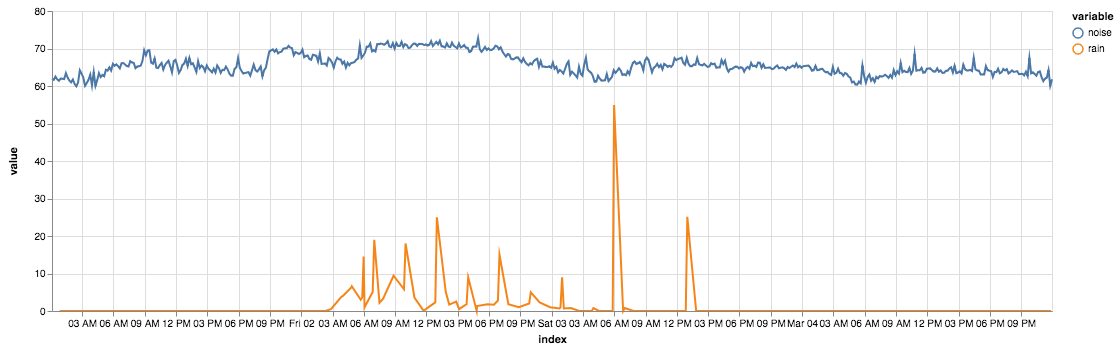

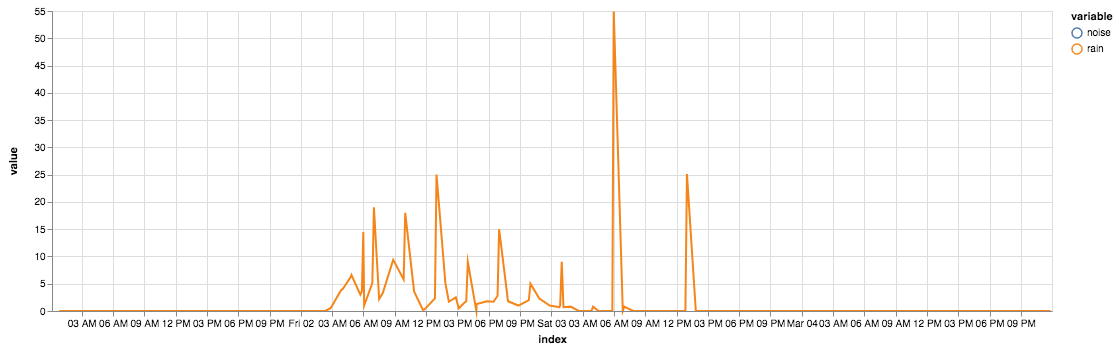

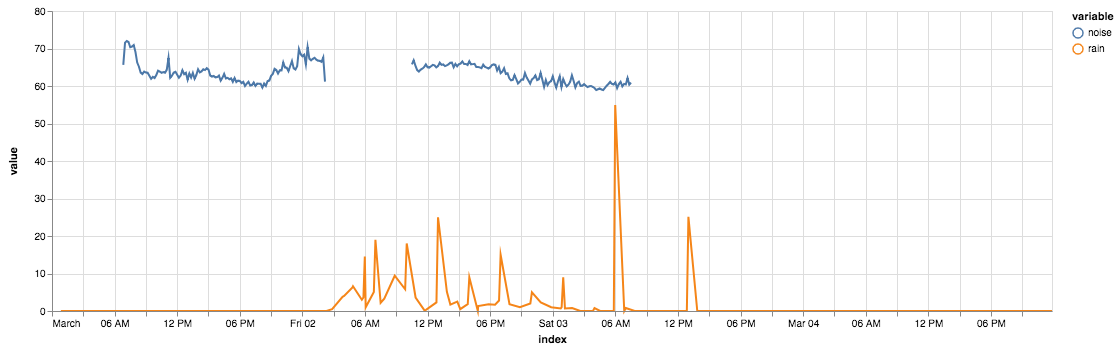

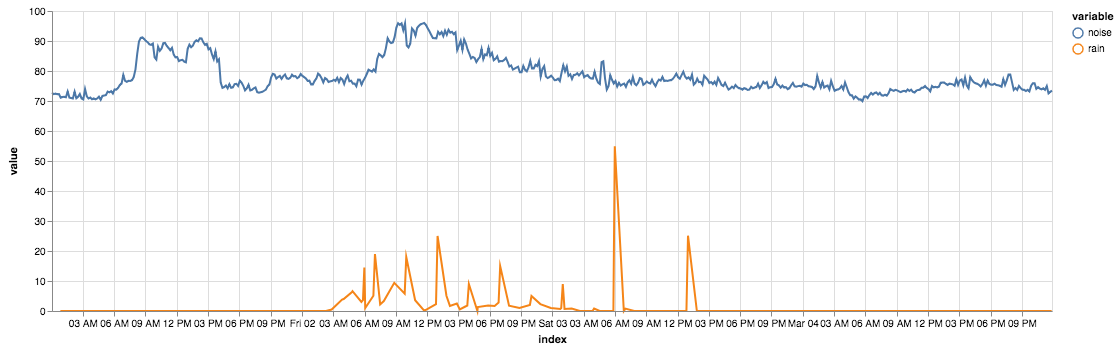

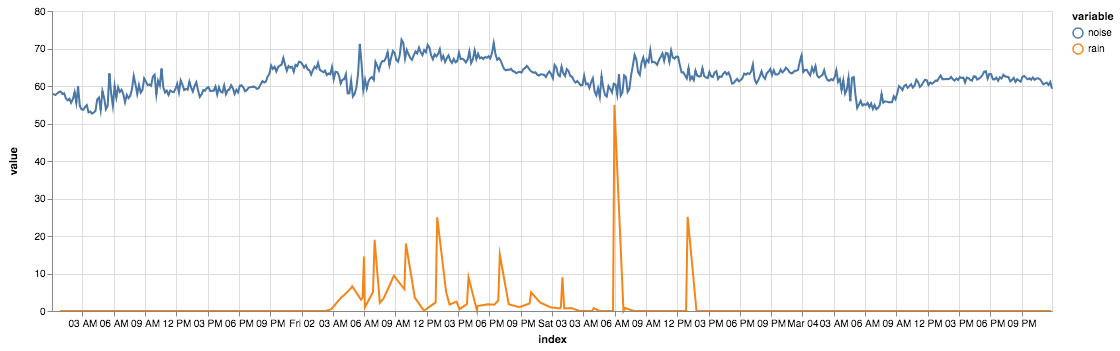

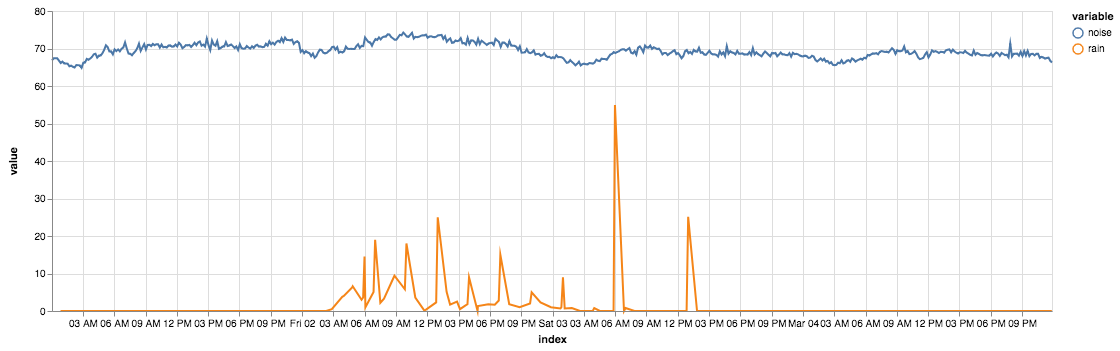

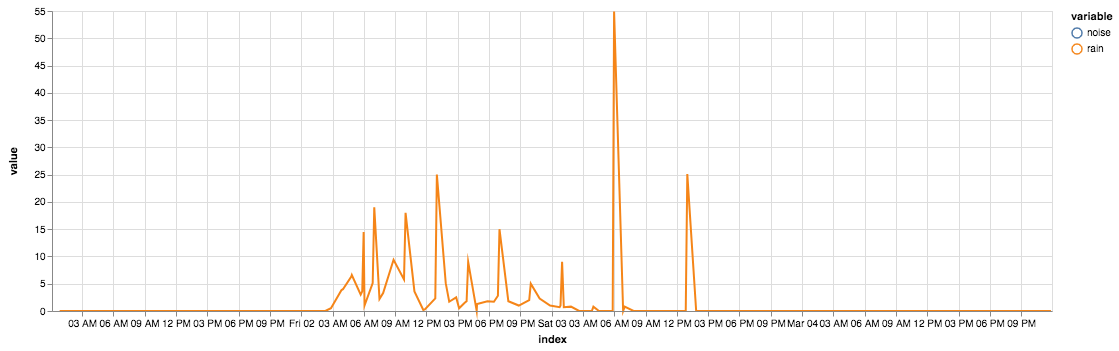

In [60]:
startDate = '2018-03-01'
endDate = '2018-03-04'

for selectedSensor in sensors:

    ## Loading timeseries from JSON file
    timeseries = sensors[selectedSensor]['data']

    ## Transforming the timeseries into a dataframe
    sensorDF = pd.DataFrame()
    sensorDF = sensorDF.append(timeseries)

    # Converting epoch to datetime
    sensorDF['ts'] = pd.to_datetime(sensorDF['ts'],unit='s')
    sensorDF['hour'] = sensorDF['ts'].dt.hour

    # Calculating dbas
    sensorDF['dbas'] = sensorDF['sum'] / sensorDF['count']

    ## Setting timestamp index
    sensorDF.set_index('ts', inplace=True)

    ## Removing unnecessary columns
    sensorDF = sensorDF[['dbas', 'hour']]

    ## Filtering for only 2018
    sensorDF = sensorDF['2018-01-01':'2018-12-31']

    ## Plotting timeseries
    # sensorDF[['dbas']].plot(figsize=(20,5))
    
    if(sensorDF[startDate:endDate].shape[0] != 0):
    
        noise = sensorDF[startDate:endDate][['dbas']]
        rain = precipitation[startDate:endDate]
        
        plotTimeseries(noise, rain)

## Pillow Fight WSP

In [ ]:
startDate = '2018-04-07'
endDate = '2018-04-07'

for selectedSensor in sensors:

    ## Loading timeseries from JSON file
    timeseries = sensors[selectedSensor]['data']

    ## Transforming the timeseries into a dataframe
    sensorDF = pd.DataFrame()
    sensorDF = sensorDF.append(timeseries)

    # Converting epoch to datetime
    sensorDF['ts'] = pd.to_datetime(sensorDF['ts'],unit='s')
    sensorDF['hour'] = sensorDF['ts'].dt.hour

    # Calculating dbas
    sensorDF['dbas'] = sensorDF['sum'] / sensorDF['count']

    ## Setting timestamp index
    sensorDF.set_index('ts', inplace=True)

    ## Removing unnecessary columns
    sensorDF = sensorDF[['dbas', 'hour']]

    ## Filtering for only 2018
    sensorDF = sensorDF['2018-01-01':'2018-12-31']

    ## Plotting timeseries
    # sensorDF[['dbas']].plot(figsize=(20,5))
    
    if(sensorDF[startDate:endDate].shape[0] != 0):
    
        noise = sensorDF[startDate:endDate][['dbas']]
        rain = precipitation[startDate:endDate]
        
        plotTimeseries(noise, rain)

## Helper functions

In [58]:
def plotTimeseries(noise, rain):
    
    noise['variable'] = 'noise'
    noise.rename(columns={'dbas':'value'}, inplace=True)
    
    rain['variable'] = 'rain'
    rain.rename(columns={'Amt[PrecipHourly1]':'value'}, inplace=True)
    
    noise = noise.append(rain)
    
    multipleTimeseries = alt.Chart(noise.reset_index()).mark_line().encode(
        x='index',
        y='value',
        color='variable').properties(width=1000)
    
    display(multipleTimeseries)